In [1]:
# load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [2]:
# load csv

NBA = pd.read_csv('NBA.csv')

In [27]:
# keep a copy

safety = NBA.copy(deep=True)

In [12]:
# not needed for now
NBA = NBA.drop(columns=['Season'])

In [13]:
# review data
NBA.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 150 entries, ('2016-17', 0) to ('2020-21', 29)
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    150 non-null    object 
 1   Wins    150 non-null    float64
 2   1 TS    150 non-null    float64
 3   1% TS   150 non-null    float64
 4   1% SC   150 non-null    float64
 5   2 TS    150 non-null    float64
 6   2% TS   150 non-null    float64
 7   2% SC   150 non-null    float64
 8   3 TS    150 non-null    float64
 9   3% TS   150 non-null    float64
 10  3% SC   150 non-null    float64
 11  4 TS    150 non-null    float64
 12  4% TS   150 non-null    float64
 13  4% SC   150 non-null    float64
 14  5 TS    150 non-null    float64
 15  5% TS   150 non-null    float64
 16  5% SC   150 non-null    float64
 17  6 TS    150 non-null    float64
 18  6% TS   150 non-null    float64
 19  6% SC   150 non-null    float64
 20  7 TS    150 non-null    float64
 21  7% TS   150 no

In [14]:
NBA.corr()

,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,3 TS,3% TS,3% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
Wins,1.000000,0.326411,0.232195,0.379294,0.368193,0.312211,0.419486,0.376587,0.332958,0.422635,...,0.456264,0.388673,0.431399,0.447764,0.376909,0.408491,0.439116,0.366512,0.393304,0.431998
1 TS,0.326411,1.000000,0.838189,0.975412,0.946364,0.836748,0.916291,0.900170,0.786214,0.845544,...,0.707733,0.783315,0.603718,0.689758,0.771756,0.555944,0.674951,0.759668,0.509839,0.660863
1% TS,0.232195,0.838189,1.000000,0.858778,0.709780,0.883849,0.716065,0.613472,0.782414,0.598060,...,0.345395,0.362933,0.476794,0.312768,0.339471,0.429838,0.285593,0.315915,0.378831,0.258671
1% SC,0.379294,0.975412,0.858778,1.000000,0.919176,0.853102,0.936676,0.885223,0.825931,0.881928,...,0.750258,0.757191,0.670982,0.731050,0.740502,0.623486,0.714243,0.723092,0.575910,0.697467
2 TS,0.368193,0.946364,0.709780,0.919176,1.000000,0.862518,0.976423,0.973325,0.844806,0.926288,...,0.793924,0.859619,0.685129,0.776062,0.849297,0.645573,0.763715,0.836694,0.604824,0.750216
2% TS,0.312211,0.836748,0.883849,0.853102,0.862518,1.000000,0.878117,0.789247,0.943146,0.783009,...,0.521264,0.526964,0.653086,0.486566,0.504216,0.616593,0.461742,0.478256,0.570442,0.433899
2% SC,0.419486,0.916291,0.716065,0.936676,0.976423,0.878117,1.000000,0.964116,0.887156,0.968185,...,0.842234,0.839757,0.755005,0.823224,0.824620,0.716350,0.809245,0.806892,0.674611,0.793308
3 TS,0.376587,0.900170,0.613472,0.885223,0.973325,0.789247,0.964116,1.000000,0.846832,0.971886,...,0.867721,0.907846,0.729467,0.850133,0.896889,0.689949,0.838785,0.884123,0.650978,0.826639
3% TS,0.332958,0.786214,0.782414,0.825931,0.844806,0.943146,0.887156,0.846832,1.000000,0.874015,...,0.631297,0.590961,0.753299,0.593841,0.564997,0.716638,0.568308,0.535928,0.670595,0.539544
3% SC,0.422635,0.845544,0.598060,0.881928,0.926288,0.783009,0.968185,0.971886,0.874015,1.000000,...,0.906600,0.871738,0.790717,0.888274,0.855959,0.753101,0.875621,0.838043,0.713912,0.861279


<Figure size 1440x1440 with 0 Axes>

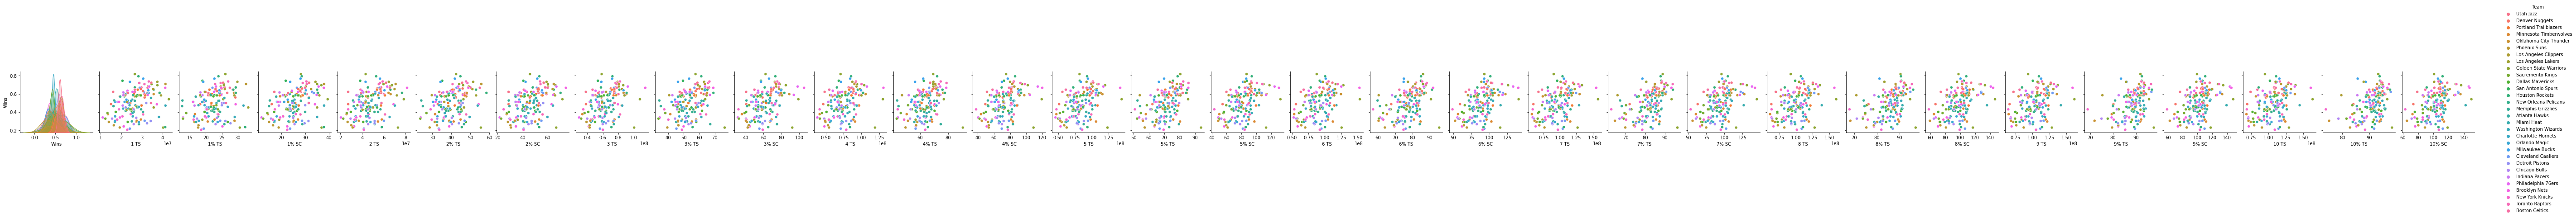

In [26]:
# explore some data
sns.pairplot(NBA, y_vars=["Wins"], hue="Team")
plt.savefig('NBA pairplot.png')

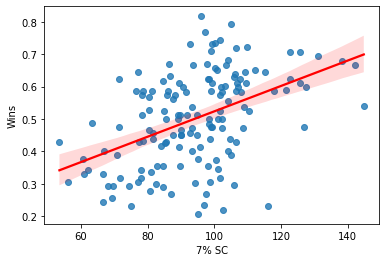

In [19]:
# Looking at the most correlated feature

sns.regplot(x=NBA['7% SC'],y=NBA['Wins'],line_kws={"color": "red"})
plt.savefig('NBA regplot.png')

In [21]:
# create test train split 
# take a quick look at the data
y = NBA['Wins']
X = NBA['7% SC']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

In [29]:
# run a linear regression

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.17528172449834734

In [30]:
# predict wins from the linear model

y_pred = model.predict(X_test)

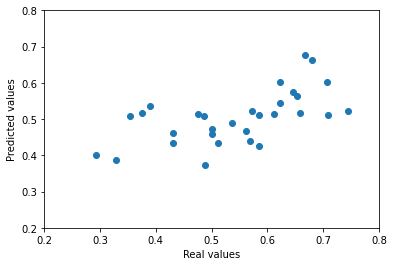

In [34]:
# plot predicted wins against actual wins

plt.scatter(y_test, y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.xticks(np.arange(0.2,0.8,0.1))
plt.yticks(np.arange(0.2,0.8,0.1))
plt.savefig('NBA linear scatter.png')

In [35]:
# Checking how Ordinary Least Squares performs
model = sm.OLS(y_train, X_train)
modelResults = model.fit()
modelResults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     25.08
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.95e-06
Time:                        17:12:32   Log-Likelihood:                 72.173
No. Observations:                 120   AIC:                            -140.3
Df Residuals:                     118   BIC:                            -134.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1327      0.072      1.834      0.069      -0.011       0.276
7% SC          0.0038      0.001      5.008      0.000       0.002       0.005
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.755
Skew:                          -0.113   Prob(JB):                        0.686
Kurtosis:                       2.684   Cond. No.                         561.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# ordinary least squares prediction
y_pred = modelResults.predict(X_test)

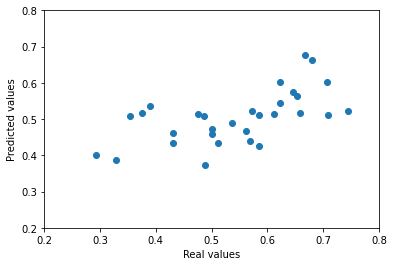

In [38]:
# OLS prediction against real
plt.scatter(y_test, y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.xticks(np.arange(0.2,0.8,0.1))
plt.yticks(np.arange(0.2,0.8,0.1))
plt.show()

In [39]:
# Now checking performance with every feature

X = NBA.drop(["Wins", "Team"],axis=1)
X = sm.add_constant(X)
y = NBA[["Wins"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [40]:
# OLS all features
model3 = sm.OLS(y_train, X_train)

model3Results = model3.fit()

model3Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2.524
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000424
Time:                        17:14:56   Log-Likelihood:                 97.544
No. Observations:                 120   AIC:                            -133.1
Df Residuals:                      89   BIC:                            -46.68
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1638      0.451      0.363      0.718      -0.733       1.061
1 TS       -2.192e-07   1.11e-07     -1.975      0.051    -4.4e-07    1.33e-09
1% TS          0.0211      0.068      0.309      0.758      -0.115       0.157
1% SC          0.2055      0.145      1.418      0.160      -0.082       0.493
2 TS        -3.74e-08   1.37e-07     -0.274      0.785   -3.09e-07    2.34e-07
2% TS         -0.0275      0.091     -0.302      0.764      -0.208       0.153
2% SC          0.0664      0.167      0.397      0.693      -0.266       0.399
3 TS        5.255e-07   1.71e-07      3.068      0.003    1.85e-07    8.66e-07
3% TS          0.0366      0.115      0.318      0.751      -0.192       0.265
3% SC         -0.5551      0.193     -2.878      0.005      -0.938      -0.172
4 TS       -5.231e-07   2.25e-07     -2.323      0.022   -9.71e-07   -7.56e-08
4% TS         -0.1958      0.152     -1.284      0.202      -0.499       0.107
4% SC          0.6716      0.286      2.352      0.021       0.104       1.239
5 TS       -8.978e-08    3.3e-07     -0.272      0.786   -7.46e-07    5.67e-07
5% TS          0.0883      0.255      0.347      0.730      -0.418       0.594
5% SC          0.0284      0.453      0.063      0.950      -0.871       0.928
6 TS        2.603e-07   5.36e-07      0.486      0.628   -8.05e-07    1.33e-06
6% TS          0.2093      0.354      0.590      0.556      -0.495       0.914
6% SC         -0.4354      0.670     -0.650      0.517      -1.766       0.895
7 TS        8.944e-08   6.68e-07      0.134      0.894   -1.24e-06    1.42e-06
7% TS         -0.1468      0.425     -0.346      0.730      -0.991       0.697
7% SC          0.0480      0.766      0.063      0.950      -1.474       1.570
8 TS       -2.006e-07   6.22e-07     -0.322      0.748   -1.44e-06    1.04e-06
8% TS          0.1249      0.268      0.467      0.642      -0.407       0.656
8% SC          0.0659      0.645      0.102      0.919      -1.216       1.348
9 TS       -1.972e-07   7.61e-07     -0.259      0.796   -1.71e-06    1.31e-06
9% TS         -0.2297      0.329     -0.699      0.486      -0.882       0.423
9% SC          0.4251      0.817      0.520      0.604      -1.198       2.048
10 TS       2.729e-07   4.23e-07      0.645      0.521   -5.68e-07    1.11e-06
10% TS         0.1132      0.220      0.516      0.607      -0.323       0.549
10% SC        -0.3871      0.498     -0.777      0.439      -1.377       0.603
==============================================================================
Omnibus:                        2.230   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.096
Skew:                          -0.322   Prob(JB):                        0.351
Kurtosis:                       2.932   Cond. No.                     2.62e+10
==

HUGE improvement 0.187 to 0.499 when you anaylse roster construction

In [41]:
#OLS prediction
y_pred = model3Results.predict(X_test)

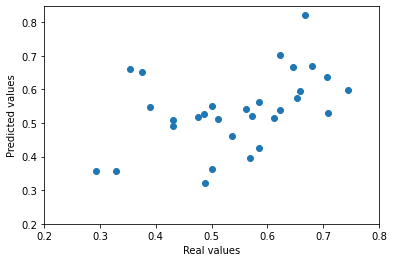

In [44]:
# plotting OLS predictions against real
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted values')
plt.xlabel('Real values')
plt.xticks(np.arange(0.2,0.8,0.1))
plt.yticks(np.arange(0.2,0.8,0.1))
plt.show()



In [45]:
# Root Mean Squared
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [46]:
# checking performance
matches = pd.DataFrame(y_test)
matches.rename(columns = {'Wins':'actual'}, inplace=True)
matches["predicted"] = y_pred

RMSE(matches["actual"], matches["predicted"])

0.12162908845610537

The RMSE tells us how far, on average, our predictions were mistaken. 
An RMSE of 0 would mean we were making perfect predictions. 
0.1216 signifies that we are, on average, about 12% off on wins prediction. 